In [ ]:
!pip install pybel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ratelimit: filename=ratelimit-2.2.1-py3-none-any.whl size=5909 sha256=8e78828d3232e5aa358071edfc82bc4665ac93d7239aa724fd65e4bc9be24b4b
  Stored in directory: /root/.cache/pip/wheels/8e/34/5e/1dd3d652594bdf5df01109a683a455121d0b726978051bf720
  Created wheel for pytrie: filename=PyTrie-0.4.0-py3-none-any.whl size=6104 sha256=126aedf7734146f1ac823e1a4fc1b61f3ad36aa6f34e1688c95c9e1d282f7c52
  Stored in directory: /root/.cache/pip/wheels/36/52/f5/01c8d6da6e03ed92a270617ec8a3e576

In [ ]:
!unzip model_300dim.pkl.zip

Archive:  model_300dim.pkl.zip
  inflating: model_300dim.pkl        


In [ ]:
!pip install RDKit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 33.7 MB/s eta 0:00:00


### This notebook is divided into two parts, in the first part we try to look at different ways for creating molecular embeddings for drug molecules and in the second part we construct a Graph based VAE architecture for molecular generation.


In [ ]:
filename = "chembl_22_clean_1576904_sorted_std_final.smi"

import pandas as pd

drugs = pd.DataFrame()

smiles=[]
ids=[]
with open(filename, 'r') as f:
    for line in f:
        # Process each line of the file
        smi = line.strip() # remove any leading/trailing whitespace
        # do something with the SMILES string

        smiles.append((smi.split("\t"))[0])
        ids.append((smi.split("\t"))[1])



  
drugs["id"] = ids
drugs["smiles"] = smiles
 

In [ ]:
#atoms = [[j for j in s] for s in smiles]
drugs = drugs[0:10000]

In [ ]:
import numpy as np

atoms = np.array(atoms)
atoms = atoms.flatten()





NameError: ignored

In [ ]:
smiles 

['CCO',
 'C',
 'CO',
 'NCCS',
 'NCCN',
 'CN',
 'C=O',
 'CCN',
 'CSC',
 'CBr',
 'CI',
 'CF',
 'CC',
 'CNC=O',
 'CCCN',
 'CCCO',
 'O=CC#C',
 'C=CC=O',
 'CC#N',
 'CCCl',
 'NC#N',
 'CC=O',
 'SC#N',
 'FCF',
 'C#C',
 'CCl',
 'C=C',
 'COC',
 'CNC',
 'CCNCC',
 'CCC',
 'N#N',
 'CNO',
 'CNN',
 'C#N',
 'CC(C)O',
 'CNC=O',
 'CCCCON',
 'CCNC=O',
 'CC(O)=O',
 'CCCCO',
 'CCCCN',
 'COCOC',
 'CCC#N',
 'CCCCC',
 'CCOCC',
 'NC(N)=N',
 'ClCCl',
 'NCC=C',
 'NC(N)=O',
 'NCCO',
 'OCCF',
 'CC=C',
 'OC=O',
 'CC#C',
 'CCCC',
 'CCBr',
 'CNNC',
 'CC=O',
 'OCCS',
 'NC=O',
 'ON=C',
 'OCCO',
 'CON',
 'CCCCl',
 'CS(C)=O',
 'ON=C',
 'Cn1ccnc1',
 'CCCCCO',
 'CCCCCC',
 'ClCCCl',
 'CCCC#C',
 'OCC(O)CO',
 'CN1CCCC1',
 'CC(=O)NO',
 'NCC(O)=O',
 'CCCCCF',
 'CCOC=O',
 'CCCCCl',
 'NCCCCN',
 'NNC(N)=O',
 'CCNCCN',
 'CNCCO',
 'N=C=N',
 'NCCCO',
 'C=C=C',
 'CCC=C',
 'CCSCC',
 'CC#CC',
 'NCCCN',
 'OCCCl',
 'OCC=C',
 'NC(=O)NO',
 'CCC=O',
 'CSCCO',
 'COC=O',
 'ClCBr',
 'C1CCSC1',
 'COCCO',
 'OCCCO',
 'OCCBr',
 'C1CN1',
 'CCON',
 '

In [ ]:
drugs.drop([667,
2599,
2604,
3490,
3493,
4579,
4580,
4581,
4583,
4584], axis=0, inplace=True)

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Convert SMILES strings to RDKit molecules
mols = [Chem.MolFromSmiles(smi) for smi in drugs["smiles"][0:5000]]
mols
# Generate Morgan fingerprints for each molecule
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in mols]

# Convert the fingerprints to numpy arrays
import numpy as np
#fp_array = np.array(fps, dtype=np.float32)

In [ ]:
fps=[]
for i in range(len(mols)):
  try:
     f= AllChem.GetMorganFingerprintAsBitVect(mols[i], 2, nBits=2048)
     fps.append(f)

  except:
    print(i)

667
2599
2604
3490
3493
4579
4580
4581
4583
4584


In [ ]:
fp_array = np.array(fps, dtype=np.float32)

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

# Fit and transform the dataset to the 3 principal components
X_pca = pca.fit_transform(fp_array)

# Print the explained variance ratio of each principal component
print(pca.explained_variance_ratio_)


[0.06172724 0.0395412 ]


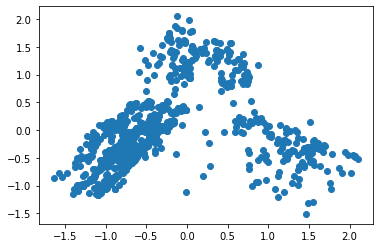

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[0:1000,0],X_pca[0:1000,1],label=ids[0:1000])

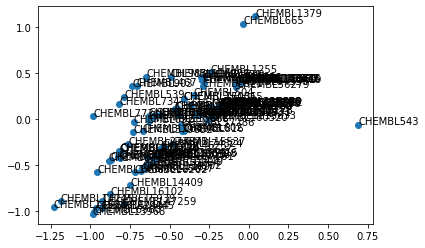

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[0:100,0],X_pca[0:100,1])
for i, txt in enumerate(ids[0:100]):
    ax.annotate(txt, (X_pca[i,0], X_pca[i,1]))

In [ ]:
AllChem.GetMorganFingerprintAsBitVect(mols[1], 2, nBits=2048)

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
kk = Chem.MolFromSmiles(smiles[0])

In [ ]:
molfp = AllChem.GetMorganFingerprintAsBitVect(kk, 2, nBits=2048)

In [ ]:
molfp = (np.array(molfp))

for m in molfp:
  if m>0:
     print(m)

1
1
1
1
1
1


In [ ]:
import tensorflow as tf

# Define a graph convolutional network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2048,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2048)
])

# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='adam', loss='mse')

# Train the model on the fingerprint data
model.fit(fp_array, fp_array, epochs=50, batch_size=64)


Epoch 1/50
78/78 [==============================] - 4s 25ms/step - loss: 0.0077
Epoch 2/50
78/78 [==============================] - 2s 21ms/step - loss: 0.0071
Epoch 3/50
78/78 [==============================] - 2s 26ms/step - loss: 0.0065
Epoch 4/50
78/78 [==============================] - 1s 17ms/step - loss: 0.0062
Epoch 5/50
78/78 [==============================] - 1s 18ms/step - loss: 0.0061
Epoch 6/50
78/78 [==============================] - 1s 17ms/step - loss: 0.0059
Epoch 7/50
78/78 [==============================] - 1s 17ms/step - loss: 0.0057
Epoch 8/50
78/78 [==============================] - 1s 17ms/step - loss: 0.0056
Epoch 9/50
78/78 [==============================] - 1s 14ms/step - loss: 0.0055
Epoch 10/50
78/78 [==============================] - 1s 18ms/step - loss: 0.0054
Epoch 11/50
78/78 [==============================] - 2s 31ms/step - loss: 0.0053
Epoch 12/50
78/78 [==============================] - 2s 25ms/step - loss: 0.0052
Epoch 13/50
78/78 [==================

In [ ]:
!pip install git+https://github.com/samoturk/mol2vec



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-cqp4zkmo
  Running command git clone --filter=blob:none --quiet https://github.com/samoturk/mol2vec /tmp/pip-req-build-cqp4zkmo
  Resolved https://github.com/samoturk/mol2vec to commit 850d944d5f48a58e26ed0264332b5741f72555aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.5 MB/s eta 0:00:00
  Created wheel for mol2vec: filename=mol2vec-0.1-py3-none-any.whl size=14038 sha256=f887883083b38989e49359c4f86add68375bea9c474deb479aac0fc9cfe54b14
  Stored in directory: /tmp/pip-ephem-wheel-cache-qf0dkbon/wheels/28/66/2a/543e91280db70c489a72de9c9fa26dca4caa7113721fb03b86
Successfully built mol2vec


In [ ]:
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)
intermediate_output = intermediate_layer_model.predict(fp_array)

156/156 [==============================] - 0s 2ms/step


In [ ]:
layer = model.layers[4]
layer

In [ ]:
pca = PCA(n_components=3)

# Fit and transform the dataset to the 3 principal components
pcs = pca.fit_transform(intermediate_output)

# Print the explained variance ratio of each principal component
print(pca.explained_variance_ratio_)


[0.4748456  0.22935006 0.1181469 ]


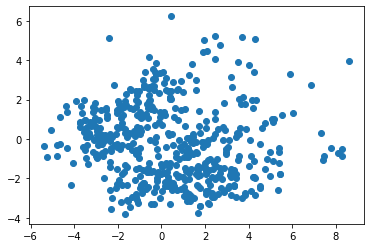

In [ ]:
plt.scatter(pcs[3000:3500,0],pcs[3000:3500,1])

In [ ]:
drugs = drugs[0:5000]

In [ ]:
drugs 

,id,smiles
0,CHEMBL545,CCO
1,CHEMBL17564,C
2,CHEMBL14688,CO
3,CHEMBL602,NCCS
4,CHEMBL816,NCCN
...,...,...
5005,CHEMBL110858,OC(=O)CCC1CCNCC1
5006,CHEMBL110803,NCCOc1cncc(Cl)c1
5007,CHEMBL110410,CCCCNC(=O)OC#CCI
5008,CHEMBL109796,SCCCCCCOc1ccccc1


In [ ]:
from rdkit import Chem
#from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

# import numpy/pandas ---------------------------------------------------------
import numpy as np
import pandas as pd

#print(">>> read the data file ... ")
#hiv = pd.read_csv('HIV.csv')
#print(">>> data shape = ", hiv.shape)
#print(">>> data columns = ", hiv.columns, "\n")
##print(hiv)
#print()

#print(">>> create mol from smiles ... ")
#drugs['mol'] = drugs['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

#pr
#drugs['sentence'] = drugs.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], radius=1)), axis=1)

#print(">>> load the word2vec model ... ")


In [ ]:
drugs.to_csv("molandsenteces.csv")

In [ ]:
for i,d in enumerate(drugs["mol"]):
    #print(d)
    #m = MolSentence(mol2alt_sentence(d, radius=1)
    try:
     mol2alt_sentence(d, radius=1)
    except:
     print(i)

5959
7681


In [ ]:
drugs = drugs.drop([5959, 7681], axis=0)


In [ ]:
drugs.drop([1], axis=0, inplace=True)


In [ ]:
drugs["sentence"][580]

MolSentence with 10 words

In [ ]:
drugs["smiles"][580]

'COC(N)=O'

In [ ]:
w2v_model = word2vec.Word2Vec.load('model_300dim.pkl')

print(">>> create embedding from sentence ... ")
drugs['embedding'] = [DfVec(x) for x in sentences2vec(drugs['sentence'], w2v_model)]

print(">>> data columns = ", drugs.columns, "\n")

hiv_mol2vec = np.array([x.vec for x in drugs['embedding']])
hiv_mol2vec = pd.DataFrame(hiv_mol2vec)
print(">>> hiv_mol2vec shape = ", hiv_mol2vec.shape)
print(hiv_mol2vec)
print()

FileNotFoundError: ignored

In [ ]:
hiv_mol2vec.to_csv("drug_embedding.csv")

In [ ]:
#drugs['embedding'] = [DfVec(x) for x in sentences2vec(drugs['sentence'], w2v_model)]
for i, x in enumerate(sentences2vec(drugs['sentence'],w2v_model)):
  try:
   (DfVec(x))
  except:
    print(i)


1


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=5)

# Fit and transform the dataset to the 3 principal components
X_pca = pca.fit_transform(hiv_mol2vec)

# Print the explained variance ratio of each principal component
print(pca.explained_variance_ratio_)


[0.2253413  0.12004504 0.0956462  0.04785069 0.04081739]


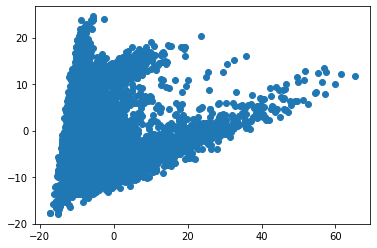

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0],X_pca[:,1],label=ids[0:1000])

In [ ]:
from sklearn.mixture import GaussianMixture
#X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
gm = GaussianMixture(n_components=3, random_state=0).fit(X_pca)

In [ ]:
labels = gm.predict(X_pca)

In [ ]:
labels

NameError: ignored

This is the Molecular embedding (PCA of 300 Dimensional embedding). 
The clustering is performed using Gaussian mixture model with 3 components and the distinction can be seen clearly.





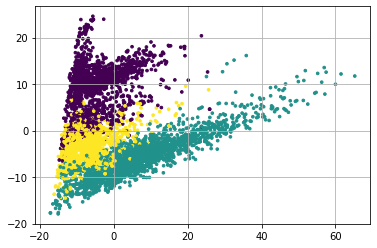

In [ ]:
plt.grid()
plt.scatter(X_pca[:,0], X_pca[:,1],c=labels,cmap="viridis",s=7)

In [ ]:
import numpy as np
qeds = np.random.rand(10000)

drugs["qed"] = qeds

drugs.head()

ValueError: ignored

In [ ]:
train_df = drugs

adjacency_tensor, feature_tensor, qed_tensor = [], [], []
for i, d in train_df.iterrows():
    try:
     adjacency, features = smiles_to_graph(d["smiles"])
     qed = d["qed"]
     adjacency_tensor.append(adjacency)
     feature_tensor.append(features)
     qed_tensor.append(qed)
    except:
     print(i)
    

adjacency_tensor = np.array(adjacency_tensor)
feature_tensor = np.array(feature_tensor)
qed_tensor = np.array(qed_tensor)

[19:00:09] Explicit valence for atom # 4 O, 3, is greater than permitted


5973


[19:00:11] Explicit valence for atom # 5 O, 3, is greater than permitted


7699


In [ ]:
features

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
molecule1 = adjacency_tensor[0]
molecule1.shape

(5, 120, 120)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

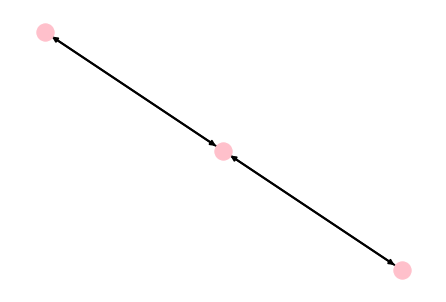

In [ ]:

# Create a new undirected graph from the adjacency matrix
G = nx.DiGraph(molecule1[0,:,:])
G.remove_nodes_from(list(nx.isolates(G)))
G.remove_edges_from(list(nx.selfloop_edges(G)))



nx.draw(G,node_size=300,width=2,node_color="pink")

In [ ]:
molecule1.shape

random_tensor = np.random.rand(molecule1.shape[0],molecule1.shape[1],molecule1.shape[2])

In [ ]:
random_tensor

array([[[0.37739704, 0.71928809, 0.54425382, ..., 0.7567857 ,
         0.49794532, 0.90693868],
        [0.08333938, 0.1026863 , 0.37580436, ..., 0.37159103,
         0.76888344, 0.93598518],
        [0.27496369, 0.84850171, 0.93915419, ..., 0.20471958,
         0.0872044 , 0.42512325],
        ...,
        [0.19113176, 0.61875852, 0.44091264, ..., 0.0815024 ,
         0.7996883 , 0.83693041],
        [0.40891735, 0.4376787 , 0.32110197, ..., 0.6119912 ,
         0.40689192, 0.04887615],
        [0.07850752, 0.95900299, 0.16096108, ..., 0.93815652,
         0.760903  , 0.94198169]],

       [[0.52212271, 0.39387608, 0.11407335, ..., 0.81736744,
         0.03726639, 0.28796644],
        [0.74819719, 0.75642474, 0.6107371 , ..., 0.4906246 ,
         0.52768133, 0.9801276 ],
        [0.31158535, 0.39333141, 0.06361486, ..., 0.71805466,
         0.15095052, 0.20075572],
        ...,
        [0.43671458, 0.28433961, 0.7007679 , ..., 0.72178436,
         0.1563162 , 0.73486613],
        [0.9

## Now for the interesting part, we would be using the SMILES strings to construct a molecular graph, then train a Graph-CNN based Variational Autoencoder to learn a latent distribution, from which we would fetch newer drug molecules ( as graphs)

In [ ]:
import keras
import pandas as pd 


,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182


In [ ]:
import ast

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from rdkit import Chem, RDLogger
from rdkit.Chem import BondType
from rdkit.Chem.Draw import MolsToGridImage
csv_path = keras.utils.get_file(
    "/content/250k_rndm_zinc_drugs_clean_3.csv",
    "https://raw.githubusercontent.com/aspuru-guzik-group/chemical_vae/master/models/zinc_properties/250k_rndm_zinc_drugs_clean_3.csv",
)

df = pd.read_csv("/content/250k_rndm_zinc_drugs_clean_3.csv")
df["smiles"] = df["smiles"].apply(lambda s: s.replace("\n", ""))
df.head()

22606589/22606589 [==============================] - 0s 0us/step


,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182


In [ ]:
!pip install rdkit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 22.6 MB/s eta 0:00:00


In [ ]:
from rdkit.Chem import BondType
import ast
SMILE_CHARSET = '["C", "B", "F", "I", "H", "O", "N", "S", "P", "Cl", "Br"]'

bond_mapping = {"SINGLE": 0, "DOUBLE": 1, "TRIPLE": 2, "AROMATIC": 3}
bond_mapping.update({0: BondType.SINGLE, 1: BondType.DOUBLE, 2: BondType.TRIPLE, 3: BondType.AROMATIC}
)
SMILE_CHARSET = ast.literal_eval(SMILE_CHARSET)

MAX_MOLSIZE = max(df["smiles"].str.len())
SMILE_to_index = dict((c, i) for i, c in enumerate(SMILE_CHARSET))
index_to_SMILE = dict((i, c) for i, c in enumerate(SMILE_CHARSET))
atom_mapping = dict(SMILE_to_index)
atom_mapping.update(index_to_SMILE)

BATCH_SIZE = 100
EPOCHS = 10

VAE_LR = 5e-4
NUM_ATOMS = 120  # Maximum number of atoms

ATOM_DIM = len(SMILE_CHARSET)  # Number of atom types
BOND_DIM = 4 + 1  # Number of bond types
LATENT_DIM = 435  # Size of the latent space


def smiles_to_graph(smiles):
    # Converts SMILES to molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Initialize adjacency and feature tensor
    adjacency = np.zeros((BOND_DIM, NUM_ATOMS, NUM_ATOMS), "float32")
    features = np.zeros((NUM_ATOMS, ATOM_DIM), "float32")

    # loop over each atom in molecule
    for atom in molecule.GetAtoms():
        i = atom.GetIdx()
        atom_type = atom_mapping[atom.GetSymbol()]
        features[i] = np.eye(ATOM_DIM)[atom_type]
        # loop over one-hop neighbors
        for neighbor in atom.GetNeighbors():
            j = neighbor.GetIdx()
            bond = molecule.GetBondBetweenAtoms(i, j)
            bond_type_idx = bond_mapping[bond.GetBondType().name]
            adjacency[bond_type_idx, [i, j], [j, i]] = 1

    # Where no bond, add 1 to last channel (indicating "non-bond")
    # Notice: channels-first
    adjacency[-1, np.sum(adjacency, axis=0) == 0] = 1

    # Where no atom, add 1 to last column (indicating "non-atom")
    features[np.where(np.sum(features, axis=1) == 0)[0], -1] = 1

    return adjacency, features


def graph_to_molecule(graph):
    # Unpack graph
    adjacency, features = graph

    # RWMol is a molecule object intended to be edited
    molecule = Chem.RWMol()

    # Remove "no atoms" & atoms with no bonds
    keep_idx = np.where(
        (np.argmax(features, axis=1) != ATOM_DIM - 1)
        & (np.sum(adjacency[:-1], axis=(0, 1)) != 0)
    )[0]
    features = features[keep_idx]
    adjacency = adjacency[:, keep_idx, :][:, :, keep_idx]

    # Add atoms to molecule
    for atom_type_idx in np.argmax(features, axis=1):
        atom = Chem.Atom(atom_mapping[atom_type_idx])
        _ = molecule.AddAtom(atom)

    # Add bonds between atoms in molecule; based on the upper triangles
    # of the [symmetric] adjacency tensor
    (bonds_ij, atoms_i, atoms_j) = np.where(np.triu(adjacency) == 1)
    for (bond_ij, atom_i, atom_j) in zip(bonds_ij, atoms_i, atoms_j):
        if atom_i == atom_j or bond_ij == BOND_DIM - 1:
            continue
        bond_type = bond_mapping[bond_ij]
        molecule.AddBond(int(atom_i), int(atom_j), bond_type)

    # Sanitize the molecule; for more information on sanitization, see
    # https://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    # Let's be strict. If sanitization fails, return None
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        return None

    return molecule

In [ ]:
molecule1 = df.loc[100]["smiles"]

smiles_to_graph(molecule1)[1]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
! unzip /content/drug_gen_graph_vae-20230330T170314Z-001.zip

Archive:  /content/drug_gen_graph_vae-20230330T170314Z-001.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/drug_gen_graph_vae-20230330T170314Z-001.zip or
        /content/drug_gen_graph_vae-20230330T170314Z-001.zip.zip, and cannot find /content/drug_gen_graph_vae-20230330T170314Z-001.zip.ZIP, period.


In [ ]:
train_df = df.sample(frac=0.75, random_state=42)  # random state is a seed value
train_df.reset_index(drop=True, inplace=True)

adjacency_tensor, feature_tensor, qed_tensor = [], [], []
for idx in range(8000):
    adjacency, features = smiles_to_graph(train_df.loc[idx]["smiles"])
    qed = train_df.loc[idx]["qed"]
    adjacency_tensor.append(adjacency)
    feature_tensor.append(features)
    qed_tensor.append(qed)

adjacency_tensor = np.array(adjacency_tensor)
feature_tensor = np.array(feature_tensor)
qed_tensor = np.array(qed_tensor)


class RelationalGraphConvLayer(keras.layers.Layer):
    def __init__(
        self,
        units=128,
        activation="relu",
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        **kwargs
    ):
        super().__init__(**kwargs)

        self.units = units
        self.activation = keras.activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
        self.bias_initializer = keras.initializers.get(bias_initializer)
        self.kernel_regularizer = keras.regularizers.get(kernel_regularizer)
        self.bias_regularizer = keras.regularizers.get(bias_regularizer)

    def build(self, input_shape):
        bond_dim = input_shape[0][1]
        atom_dim = input_shape[1][2]

        self.kernel = self.add_weight(
            shape=(bond_dim, atom_dim, self.units),
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            trainable=True,
            name="W",
            dtype=tf.float32,
        )

        if self.use_bias:
            self.bias = self.add_weight(
                shape=(bond_dim, 1, self.units),
                initializer=self.bias_initializer,
                regularizer=self.bias_regularizer,
                trainable=True,
                name="b",
                dtype=tf.float32,
            )

        self.built = True

    def call(self, inputs, training=False):
        adjacency, features = inputs
        # Aggregate information from neighbors
        x = tf.matmul(adjacency, features[:, None, :, :])
        # Apply linear transformation
        x = tf.matmul(x, self.kernel)
        if self.use_bias:
            x += self.bias
        # Reduce bond types dim
        x_reduced = tf.reduce_sum(x, axis=1)
        # Apply non-linear transformation
        return self.activation(x_reduced)


In [ ]:
def get_encoder(
    gconv_units, latent_dim, adjacency_shape, feature_shape, dense_units, dropout_rate
):
    adjacency = keras.layers.Input(shape=adjacency_shape)
    features = keras.layers.Input(shape=feature_shape)

    # Propagate through one or more graph convolutional layers
    features_transformed = features
    for units in gconv_units:
        features_transformed = RelationalGraphConvLayer(units)(
            [adjacency, features_transformed]
        )
    # Reduce 2-D representation of molecule to 1-D
    x = keras.layers.GlobalAveragePooling1D()(features_transformed)

    # Propagate through one or more densely connected layers
    for units in dense_units:
        x = layers.Dense(units, activation="relu")(x)
        x = layers.Dropout(dropout_rate)(x)

    z_mean = layers.Dense(latent_dim, dtype="float32", name="z_mean")(x)
    log_var = layers.Dense(latent_dim, dtype="float32", name="log_var")(x)

    encoder = keras.Model([adjacency, features], [z_mean, log_var], name="encoder")

    return encoder


def get_decoder(dense_units, dropout_rate, latent_dim, adjacency_shape, feature_shape):
    latent_inputs = keras.Input(shape=(latent_dim,))

    x = latent_inputs
    for units in dense_units:
        x = keras.layers.Dense(units, activation="tanh")(x)
        x = keras.layers.Dropout(dropout_rate)(x)

    # Map outputs of previous layer (x) to [continuous] adjacency tensors (x_adjacency)
    x_adjacency = keras.layers.Dense(tf.math.reduce_prod(adjacency_shape))(x)
    x_adjacency = keras.layers.Reshape(adjacency_shape)(x_adjacency)
    # Symmetrify tensors in the last two dimensions
    x_adjacency = (x_adjacency + tf.transpose(x_adjacency, (0, 1, 3, 2))) / 2
    x_adjacency = keras.layers.Softmax(axis=1)(x_adjacency)

    # Map outputs of previous layer (x) to [continuous] feature tensors (x_features)
    x_features = keras.layers.Dense(tf.math.reduce_prod(feature_shape))(x)
    x_features = keras.layers.Reshape(feature_shape)(x_features)
    x_features = keras.layers.Softmax(axis=2)(x_features)

    decoder = keras.Model(
        latent_inputs, outputs=[x_adjacency, x_features], name="decoder"
    )

    return decoder

In [ ]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_log_var)[0]
        dim = tf.shape(z_log_var)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
class MoleculeGenerator(keras.Model):
    def __init__(self, encoder, decoder, max_len, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.property_prediction_layer = layers.Dense(1)
        self.max_len = max_len

        self.train_total_loss_tracker = keras.metrics.Mean(name="train_total_loss")
        self.val_total_loss_tracker = keras.metrics.Mean(name="val_total_loss")

    def train_step(self, data):
        adjacency_tensor, feature_tensor, qed_tensor = data[0]
        graph_real = [adjacency_tensor, feature_tensor]
        self.batch_size = tf.shape(qed_tensor)[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, qed_pred, gen_adjacency, gen_features = self(
                graph_real, training=True
            )
            graph_generated = [gen_adjacency, gen_features]
            total_loss = self._compute_loss(
                z_log_var, z_mean, qed_tensor, qed_pred, graph_real, graph_generated
            )

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.train_total_loss_tracker.update_state(total_loss)
        return {"loss": self.train_total_loss_tracker.result()}

    def _compute_loss(
        self, z_log_var, z_mean, qed_true, qed_pred, graph_real, graph_generated
    ):

        adjacency_real, features_real = graph_real
        adjacency_gen, features_gen = graph_generated

        adjacency_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.categorical_crossentropy(adjacency_real, adjacency_gen),
                axis=(1, 2),
            )
        )
        features_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.categorical_crossentropy(features_real, features_gen),
                axis=(1),
            )
        )
        kl_loss = -0.5 * tf.reduce_sum(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), 1
        )
        kl_loss = tf.reduce_mean(kl_loss)

        property_loss = tf.reduce_mean(
            keras.losses.binary_crossentropy(qed_true, qed_pred)
        )

        graph_loss = self._gradient_penalty(graph_real, graph_generated)

        return kl_loss + property_loss + graph_loss + adjacency_loss + features_loss

    def _gradient_penalty(self, graph_real, graph_generated):
        # Unpack graphs
        adjacency_real, features_real = graph_real
        adjacency_generated, features_generated = graph_generated

        # Generate interpolated graphs (adjacency_interp and features_interp)
        alpha = tf.random.uniform([self.batch_size])
        alpha = tf.reshape(alpha, (self.batch_size, 1, 1, 1))
        adjacency_interp = (adjacency_real * alpha) + (1 - alpha) * adjacency_generated
        alpha = tf.reshape(alpha, (self.batch_size, 1, 1))
        features_interp = (features_real * alpha) + (1 - alpha) * features_generated

        # Compute the logits of interpolated graphs
        with tf.GradientTape() as tape:
            tape.watch(adjacency_interp)
            tape.watch(features_interp)
            _, _, logits, _, _ = self(
                [adjacency_interp, features_interp], training=True
            )

        # Compute the gradients with respect to the interpolated graphs
        grads = tape.gradient(logits, [adjacency_interp, features_interp])
        # Compute the gradient penalty
        grads_adjacency_penalty = (1 - tf.norm(grads[0], axis=1)) ** 2
        grads_features_penalty = (1 - tf.norm(grads[1], axis=2)) ** 2
        return tf.reduce_mean(
            tf.reduce_mean(grads_adjacency_penalty, axis=(-2, -1))
            + tf.reduce_mean(grads_features_penalty, axis=(-1))
        )

    def inference(self, batch_size):
        z = tf.random.normal((batch_size, LATENT_DIM))
        reconstruction_adjacency, reconstruction_features = model.decoder.predict(z)
        # obtain one-hot encoded adjacency tensor
        adjacency = tf.argmax(reconstruction_adjacency, axis=1)
        adjacency = tf.one_hot(adjacency, depth=BOND_DIM, axis=1)
        # Remove potential self-loops from adjacency
        adjacency = tf.linalg.set_diag(adjacency, tf.zeros(tf.shape(adjacency)[:-1]))
        # obtain one-hot encoded feature tensor
        features = tf.argmax(reconstruction_features, axis=2)
        features = tf.one_hot(features, depth=ATOM_DIM, axis=2)
        return [
            graph_to_molecule([adjacency[i].numpy(), features[i].numpy()])
            for i in range(batch_size)
        ]

    def call(self, inputs):
        z_mean, log_var = self.encoder(inputs)
        z = Sampling()([z_mean, log_var])

        gen_adjacency, gen_features = self.decoder(z)

        property_pred = self.property_prediction_layer(z_mean)

        return z_mean, log_var, property_pred, gen_adjacency, gen_features

In [ ]:
tf.random.normal((100, 512))

<tf.Tensor: shape=(100, 512), dtype=float32, numpy=
array([[ 0.894614  , -2.6060781 ,  0.18567747, ...,  0.07166108,
         1.1560796 , -0.55567944],
       [-0.67603064,  0.65781164,  0.4770192 , ..., -0.25635314,
         1.8079933 , -1.1870692 ],
       [ 0.21387303, -0.47739246,  0.26142094, ..., -2.4145393 ,
        -0.02337439,  1.4163117 ],
       ...,
       [ 2.6089327 ,  1.6884248 , -0.55893975, ...,  0.77719337,
        -1.3379177 ,  0.3943917 ],
       [-0.18630953, -0.29861188,  0.27036726, ..., -0.8250461 ,
         0.29834074,  1.2528055 ],
       [-1.7041692 ,  0.8298943 , -1.0068663 , ..., -0.24854164,
        -1.1000712 , -0.42007625]], dtype=float32)>

In [ ]:
vae_optimizer = tf.keras.optimizers.Adam(learning_rate=VAE_LR)

encoder = get_encoder(
    gconv_units=[9],
    adjacency_shape=(BOND_DIM, NUM_ATOMS, NUM_ATOMS),
    feature_shape=(NUM_ATOMS, ATOM_DIM),
    latent_dim=LATENT_DIM,
    dense_units=[512],
    dropout_rate=0.0,
)
decoder = get_decoder(
    dense_units=[128, 256, 512],
    dropout_rate=0.2,
    latent_dim=LATENT_DIM,
    adjacency_shape=(BOND_DIM, NUM_ATOMS, NUM_ATOMS),
    feature_shape=(NUM_ATOMS, ATOM_DIM),
)

model = MoleculeGenerator(encoder, decoder, MAX_MOLSIZE)

model.compile(vae_optimizer)
history = model.fit([adjacency_tensor, feature_tensor, qed_tensor], epochs=EPOCHS)

Epoch 1/10
250/250 [==============================] - 237s 930ms/step - loss: 68998.4611
Epoch 2/10
250/250 [==============================] - 229s 915ms/step - loss: 68843.7002
Epoch 3/10
250/250 [==============================] - 227s 908ms/step - loss: 68836.7580
Epoch 4/10
250/250 [==============================] - 229s 915ms/step - loss: 68828.4716
Epoch 5/10
250/250 [==============================] - 230s 921ms/step - loss: 68811.9019
Epoch 6/10
250/250 [==============================] - 227s 910ms/step - loss: 68821.1191
Epoch 7/10
250/250 [==============================] - 227s 910ms/step - loss: 68816.6908
Epoch 8/10
250/250 [==============================] - 227s 909ms/step - loss: 68807.7723
Epoch 9/10
250/250 [==============================] - 238s 953ms/step - loss: 68814.5180
Epoch 10/10
250/250 [==============================] - 230s 921ms/step - loss: 68808.3094


In [ ]:
model.save("drug_gen_graph_vae")


In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
# copy it there
!cp -r drug_gen_graph_vae /content/drive/MyDrive

63/63 [==============================] - 8s 132ms/step


[18:39:02] non-ring atom 3 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] non-ring atom 2 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] non-ring atom 3 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] Explicit valence for atom # 0 H, 124, is greater than permitted
[18:39:02] non-ring atom 3 marked aromatic
[18:39:02] Explicit valence for atom # 0 B, 123, is greater than permitted
[18:39:02] Explicit valence for atom # 0 P, 125, is greater than permitted
[18:39:02] Explicit valence for atom # 0 P, 121, is greater than permitted
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] non-ring atom 4 marked aromatic
[18:39:02] Explicit valence for atom # 0 S, 147, is greater than permitted
[18:39:02] Explicit val

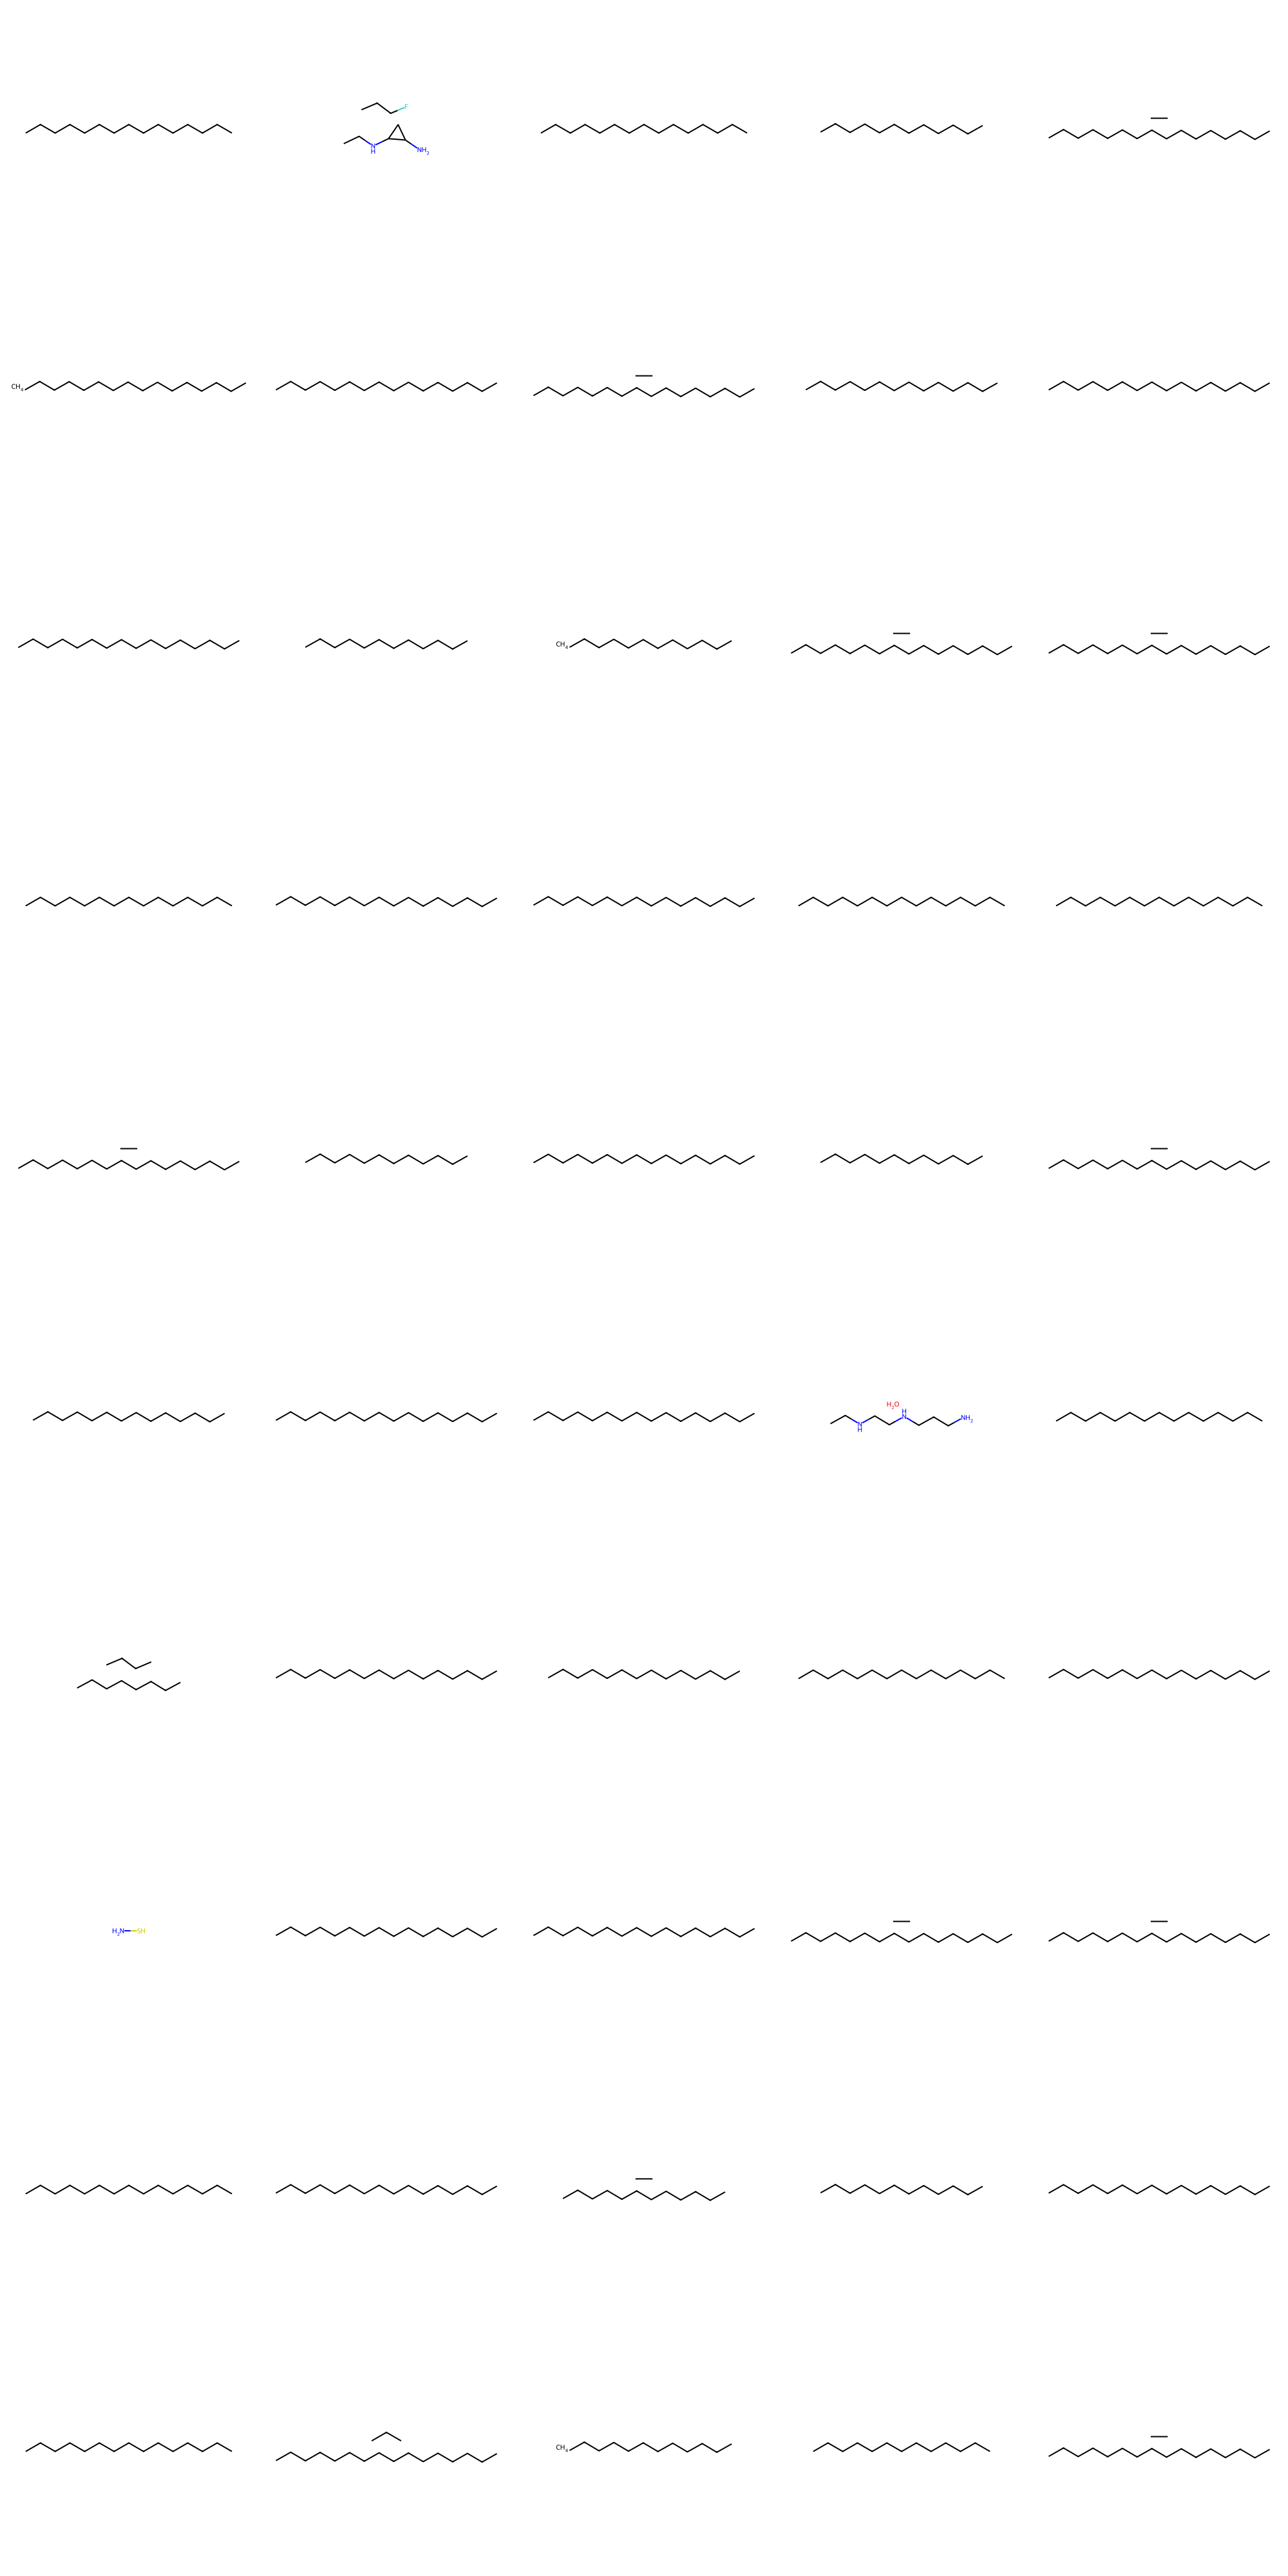

In [ ]:
molecules = model.inference(2000)

MolsToGridImage(
    [m for m in molecules if m is not None][:1000], molsPerRow=5, subImgSize=(400, 400)
)